# Results Analysis

This nootbook is used to to run the OLS and Logit model on the infered dataset, and perform additional descriptive analysis.

1. Import and Setup
2. Control Variables
3. OLS & Logit
4. Additional Descriptive Analysis

Dependent Variables - Score, Number of Comments, Has Awards

--- 
## Import and Setup

In [258]:
import os
import sys
import logging

sys.path.append(os.path.abspath("../"))

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from stargazer.stargazer import Stargazer
from IPython.core.display import display, HTML

import utils 

utils.logger_init()

/tmp/ipykernel_70655/4056576042.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
2024-12-16 06:01:00,594 - root - INFO - Logger initialized


In [259]:
df_inference = pd.read_csv("inference_saves/llava_all/llava_all_final.csv")
display(df_inference)

,id,total_duration,label,label_clean,label_common,meta,stable,remixed,labelled,screenshot,...,photo,drawing,emotional_reaction,template,event_reaction,macro,situational,comic,meme_character,none
0,15v9uaw,3.749692,"[' Situational ', ' Situational ', ' Situation...","['situational', 'situational', 'situational', ...",situational,{'prompt': 'Label the meme according to these ...,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
1,164cv6s,3.495662,"[' Photo ', ' photo ', ' Text ', ' Memes are o...","['photo', 'photo', 'text', 'none', 'photo', 't...",photo,{'prompt': 'Label the meme according to these ...,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,15pdqiu,3.583820,"[' Text ', ' Text ', ' Situational ', ' Memes ...","['text', 'text', 'situational', 'none', 'drawi...",situational,{'prompt': 'Label the meme according to these ...,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
3,160tlkj,3.474812,"[' Text ', ' Situational ', ' Situational ', '...","['text', 'situational', 'situational', 'situat...",situational,{'prompt': 'Label the meme according to these ...,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
4,15r4mcb,3.442208,"[' Text ', ' Template ', ' Situational ', ' Te...","['text', 'template', 'situational', 'template'...",text,{'prompt': 'Label the meme according to these ...,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76206,10caao4,3.647812,"[' Situational ', ' Comic ', ' Situational ', ...","['situational', 'comic', 'situational', 'situa...",situational,{'prompt': 'Label the meme according to these ...,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
76207,10a6qv1,3.608381,"[' Situational ', ' Text ', ' Text ', ' Emotio...","['situational', 'text', 'text', 'emotional_rea...",text,{'prompt': 'Label the meme according to these ...,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
76208,100byxg,3.685954,"[' Situational ', ' This image is a template',...","['situational', 'template', 'none', 'text', 'n...",situational,{'prompt': 'Label the meme according to these ...,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
76209,107b8hh,3.656371,"[' Text ', ' Situational ', ' Situational ', '...","['text', 'situational', 'situational', 'text',...",situational,{'prompt': 'Label the meme according to these ...,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False


In [260]:
df_raw = pd.read_csv(r"../Data Collection Functions/new_rmemes23_posts.csv")
display(df_raw)

/tmp/ipykernel_70655/3082282186.py:1: DtypeWarning: Columns (6,12,15,69,81,82,88,89,96,98,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(r"../Data Collection Functions/new_rmemes23_posts.csv")


,all_awardings,allow_live_comments,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,_meta,previous_selftext,selftext_html,status,comment_category,created_month,created_hour,time_of_day,score_category,stratify_label
0,[],False,False,neerajanchan,NaN,#edeff1,NaN,2ddfba36-9250-11eb-80e3-0e922fe18c27,Like a boss,dark,...,NaN,NaN,NaN,OK,High ]15+],August,7,Morning ]6am-12am],Low [1-10],High ]15+]_Low [1-10]_August
1,[],False,False,1minuteryan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OK,High ]15+],August,8,Morning ]6am-12am],Low [1-10],High ]15+]_Low [1-10]_August
2,[],False,False,mortsGB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OK,High ]15+],August,19,Evening ]6pm-12pm],Low [1-10],High ]15+]_Low [1-10]_August
3,[],False,False,FeelingDesigner,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OK,High ]15+],August,8,Morning ]6am-12am],Low [1-10],High ]15+]_Low [1-10]_August
4,[],False,False,oranke_dino,NaN,#edeff1,NaN,2fa29d9e-2629-11ec-90ef-0afc8e504dd4,Cringe Factory,dark,...,NaN,NaN,NaN,OK,High ]15+],August,19,Evening ]6pm-12pm],Low [1-10],High ]15+]_Low [1-10]_August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76276,[],False,False,davidmcdavidsonson,1.566300e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OK,Medium ]5-15],January,4,Night [0am-6am],NaN,Medium ]5-15]_nan_January
76277,[],False,False,huge_throbbing_pp,1.638336e+09,#edeff1,NaN,f036c12c-2627-11ec-9b64-52efb020cf8a,Average r/memes enjoyer,dark,...,NaN,NaN,NaN,OK,Medium ]5-15],January,18,Evening ]6pm-12pm],NaN,Medium ]5-15]_nan_January
76278,[],False,False,Still-Anxiety-8261,1.628754e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OK,Medium ]5-15],January,4,Night [0am-6am],NaN,Medium ]5-15]_nan_January
76279,[],False,False,superbloggity,1.562246e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OK,Medium ]5-15],January,10,Morning ]6am-12am],NaN,Medium ]5-15]_nan_January


In [261]:
display(df_raw["score"].value_counts())

score
1        52472
2         1231
0         1060
3          667
7          601
         ...  
704          1
1989         1
3779         1
18349        1
3994         1
Name: count, Length: 2684, dtype: int64

In [262]:
display(df_raw["num_comments"].value_counts())

num_comments
1       40981
0        8336
2        7876
3        4011
4        2883
        ...  
363         1
1267        1
466         1
575         1
2082        1
Name: count, Length: 750, dtype: int64

In [263]:
display(df_raw["total_awards_received"].value_counts())

total_awards_received
0     75853
1       338
2        44
3        15
4        12
5        10
6         4
8         2
12        1
7         1
11        1
Name: count, dtype: int64

In [264]:
df_raw["has_awards"] = df_raw["total_awards_received"] > 0
display(df_raw["has_awards"].value_counts())

has_awards
False    75853
True       428
Name: count, dtype: int64

---
## Control Variables

 - CV_num_comments -> 'locked', 'author_premium', 'removed_post', 'Q1', 'Q2', 'Q3'
 - CV_score -> 'author_premium', 'removed_post', 'Q1', 'Q2', 'Q3'
 - CV_awards -> 'author_premium', 'removed_post'

In [265]:
display(df_raw["locked"].value_counts())

locked
False    70518
True      5763
Name: count, dtype: int64

In [266]:
display(df_raw["removed_by_category"].value_counts())

removed_by_category
moderator    38229
reddit        5856
deleted          9
Name: count, dtype: int64

In [267]:
df_raw["removed_post"] = df_raw["removed_by_category"].apply(lambda x: ~ pd.isna(x))
display(df_raw["removed_post"].value_counts())

/tmp/ipykernel_70655/3472399431.py:1: DeprecationWarning: Bitwise inversion '~' on bool is deprecated and will be removed in Python 3.16. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  df_raw["removed_post"] = df_raw["removed_by_category"].apply(lambda x: ~ pd.isna(x))


removed_post
-1    44094
-2    32187
Name: count, dtype: int64

In [268]:
display(df_raw["created_month"].value_counts())

created_month
January      8142
September    6991
July         6886
August       6694
February     6614
December     6486
October      6288
March        6111
November     5876
April        5625
June         5375
May          5193
Name: count, dtype: int64

In [269]:
quarters = {"Q1": ["January", "February", "March"],
            "Q2": ["April", "May", "June"],
            "Q3": ["July", "August", "September"],
            "Q4": ["October", "November", "December"]}
df_raw["created_quarter"] = df_raw["created_month"].apply(lambda x: [q for q in quarters if x in quarters[q]][0])
display(df_raw["created_quarter"].value_counts())

created_quarter
Q1    20867
Q3    20571
Q4    18650
Q2    16193
Name: count, dtype: int64

In [270]:
quarter_dummies = pd.get_dummies(df_raw["created_quarter"]).drop(columns=["Q4"])
df_raw = pd.concat([df_raw, quarter_dummies], axis=1)
df_raw.drop(columns=["created_quarter"], inplace=True)

In [271]:
display(df_raw["author_premium"].value_counts())

author_premium
False    72845
True      2721
Name: count, dtype: int64

In [272]:
label_columns = list(df_inference.columns[-15:-1])
label_columns.append("id")
print(label_columns)

['stable', 'remixed', 'labelled', 'screenshot', 'text', 'photo', 'drawing', 'emotional_reaction', 'template', 'event_reaction', 'macro', 'situational', 'comic', 'meme_character', 'id']


In [273]:
df_ols = df_inference[label_columns].merge(df_raw[["id", "score", "num_comments","has_awards", "locked", "author_premium", "removed_post", "Q1", "Q2", "Q3"]], on="id")
display(df_ols)

,stable,remixed,labelled,screenshot,text,photo,drawing,emotional_reaction,template,event_reaction,...,id,score,num_comments,has_awards,locked,author_premium,removed_post,Q1,Q2,Q3
0,False,True,True,False,False,False,False,False,False,False,...,15v9uaw,1,25,False,False,False,-2,False,False,True
1,True,False,True,False,False,True,False,False,False,False,...,164cv6s,1,60,False,False,False,-2,False,False,True
2,False,True,True,False,False,False,False,False,False,False,...,15pdqiu,1,18,False,False,False,-2,False,False,True
3,False,True,True,False,False,False,False,False,False,False,...,160tlkj,1,481,False,False,False,-2,False,False,True
4,True,False,True,False,True,False,False,False,False,False,...,15r4mcb,1,27,False,False,False,-2,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76206,False,True,True,False,False,False,False,False,False,False,...,10caao4,0,8,False,False,False,-2,True,False,False
76207,True,False,True,False,True,False,False,False,False,False,...,10a6qv1,0,13,False,False,False,-2,True,False,False
76208,False,True,True,False,False,False,False,False,False,False,...,100byxg,0,8,False,False,False,-2,True,False,False
76209,False,True,True,False,False,False,False,False,False,False,...,107b8hh,0,14,False,False,False,-2,True,False,False


In [274]:
display(df_ols.isna().sum())

stable                  0
remixed                 0
labelled                0
screenshot              0
text                    0
photo                   0
drawing                 0
emotional_reaction      0
template                0
event_reaction          0
macro                   0
situational             0
comic                   0
meme_character          0
id                      0
score                   0
num_comments            0
has_awards              0
locked                  0
author_premium        715
removed_post            0
Q1                      0
Q2                      0
Q3                      0
dtype: int64

In [275]:
df_ols["author_premium"] = df_ols["author_premium"].fillna(False)

/tmp/ipykernel_70655/3887104064.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ols["author_premium"] = df_ols["author_premium"].fillna(False)


In [276]:
display(df_ols.dtypes)

stable                  bool
remixed                 bool
labelled                bool
screenshot              bool
text                    bool
photo                   bool
drawing                 bool
emotional_reaction      bool
template                bool
event_reaction          bool
macro                   bool
situational             bool
comic                   bool
meme_character          bool
id                    object
score                  int64
num_comments           int64
has_awards              bool
locked                  bool
author_premium          bool
removed_post           int64
Q1                      bool
Q2                      bool
Q3                      bool
dtype: object

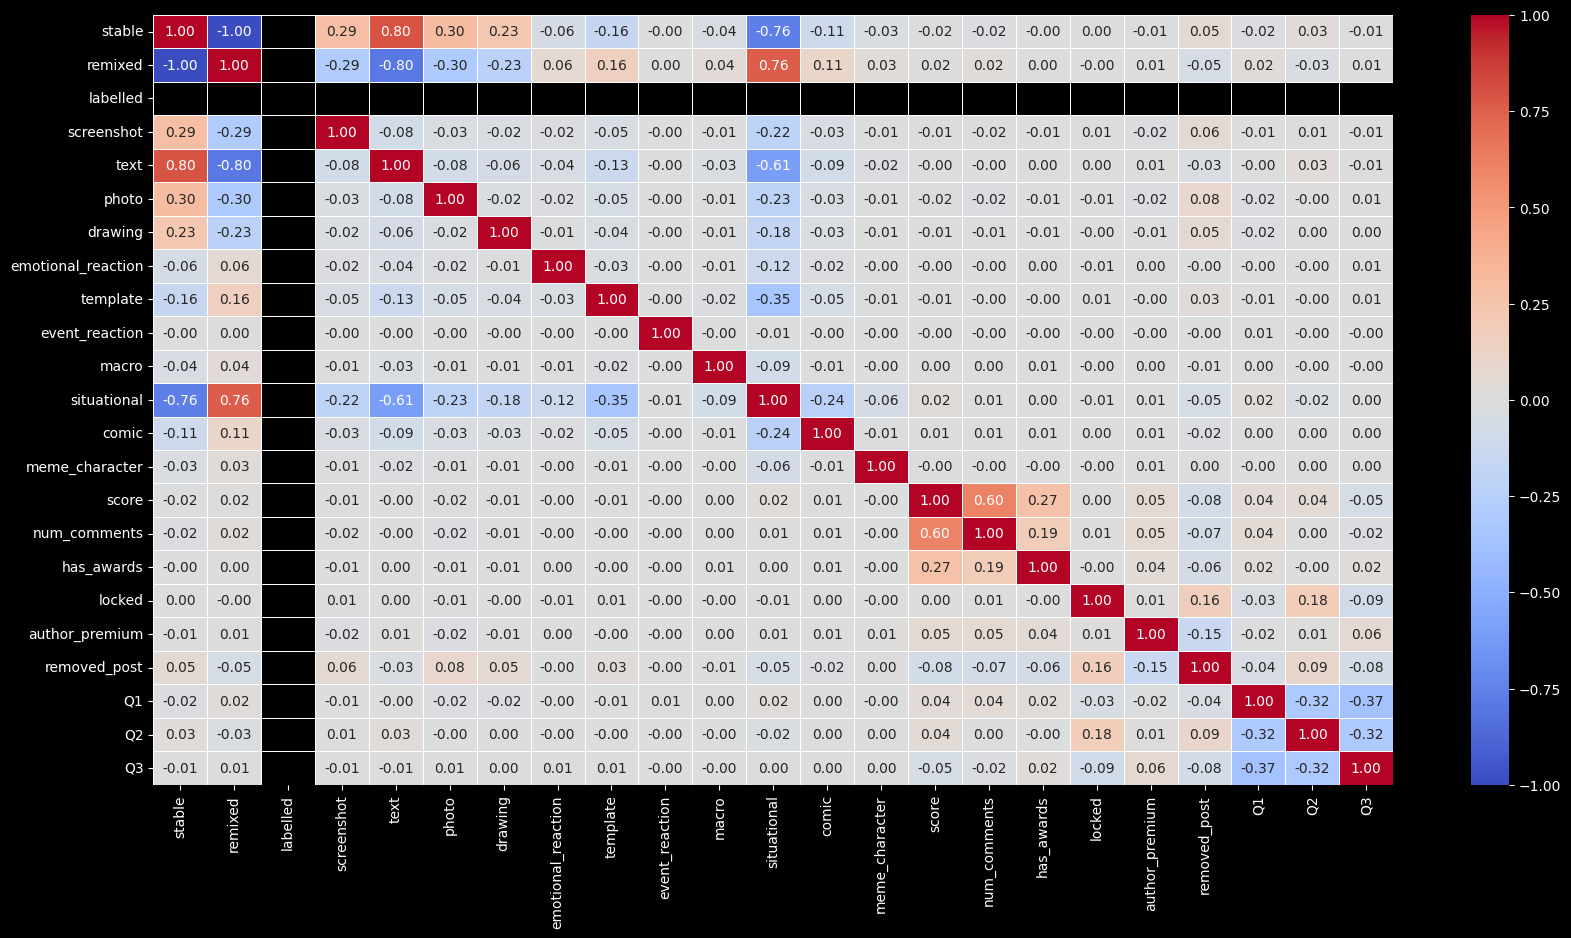

,stable,remixed,labelled,screenshot,text,photo,drawing,emotional_reaction,template,event_reaction,...,meme_character,score,num_comments,has_awards,locked,author_premium,removed_post,Q1,Q2,Q3
stable,1.000000,-1.000000,NaN,0.292607,0.796395,0.297104,0.234323,-0.055689,-0.159314,-0.004265,...,-0.028643,-0.015481,-0.017507,-0.004878,0.001862,-0.010839,0.047493,-0.016685,0.026510,-0.011406
remixed,-1.000000,1.000000,NaN,-0.292607,-0.796395,-0.297104,-0.234323,0.055689,0.159314,0.004265,...,0.028643,0.015481,0.017507,0.004878,-0.001862,0.010839,-0.047493,0.016685,-0.026510,0.011406
labelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screenshot,0.292607,-0.292607,NaN,1.000000,-0.080753,-0.030126,-0.023760,-0.016295,-0.046617,-0.001248,...,-0.008381,-0.014707,-0.015044,-0.007697,0.010385,-0.022145,0.059417,-0.005653,0.005864,-0.008589
text,0.796395,-0.796395,NaN,-0.080753,1.000000,-0.081994,-0.064668,-0.044351,-0.126877,-0.003397,...,-0.022811,-0.000088,-0.001538,0.003144,0.003094,0.009551,-0.026778,-0.002144,0.026240,-0.013741
photo,0.297104,-0.297104,NaN,-0.030126,-0.081994,1.000000,-0.024125,-0.016545,-0.047333,-0.001267,...,-0.008510,-0.015594,-0.016833,-0.006936,-0.009650,-0.020727,0.080779,-0.019283,-0.000462,0.008289
drawing,0.234323,-0.234323,NaN,-0.023760,-0.064668,-0.024125,1.000000,-0.013049,-0.037331,-0.000999,...,-0.006712,-0.012023,-0.012479,-0.006475,-0.003509,-0.008772,0.054715,-0.016638,0.004446,0.002401
emotional_reaction,-0.055689,0.055689,NaN,-0.016295,-0.044351,-0.016545,-0.013049,1.000000,-0.025603,-0.000685,...,-0.004603,-0.003013,-0.004727,0.002254,-0.010112,0.000659,-0.001585,-0.003154,-0.004304,0.008379
template,-0.159314,0.159314,NaN,-0.046617,-0.126877,-0.047333,-0.037331,-0.025603,1.000000,-0.001961,...,-0.013168,-0.008008,-0.001757,-0.003627,0.014535,-0.001578,0.025058,-0.007086,-0.000595,0.007441
event_reaction,-0.004265,0.004265,NaN,-0.001248,-0.003397,-0.001267,-0.000999,-0.000685,-0.001961,1.000000,...,-0.000353,-0.000711,-0.000832,-0.000544,-0.002072,-0.001394,-0.001141,0.011801,-0.003762,-0.004404


In [277]:
corr_matrix = df_ols.drop(columns="id").corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()
display(corr_matrix)

In [278]:
df_ols.dtypes

stable                  bool
remixed                 bool
labelled                bool
screenshot              bool
text                    bool
photo                   bool
drawing                 bool
emotional_reaction      bool
template                bool
event_reaction          bool
macro                   bool
situational             bool
comic                   bool
meme_character          bool
id                    object
score                  int64
num_comments           int64
has_awards              bool
locked                  bool
author_premium          bool
removed_post           int64
Q1                      bool
Q2                      bool
Q3                      bool
dtype: object

In [279]:
df_inference["label_common"].value_counts()

label_common
situational           47743
text                  13732
template               5201
comic                  2462
photo                  2262
screenshot             2196
drawing                1423
emotional_reaction      676
macro                   332
meme_character          180
event_reaction            4
Name: count, dtype: int64

---
## OLS & Logit 1 - independent variables:
- screenshot
- text
- photo
- drawing
- emotional_reaction
- template
- event_reaction
- macro
- situational
- comic
- meme_character


In [280]:
independent_variables = ["screenshot", "text", "photo", "drawing", "emotional_reaction",
                          "template", "event_reaction", "macro", "comic",
                          "meme_character"]   # Dropped situational to avoid multicollinearity

### OLS Log Score 

In [281]:
cv_score = ["author_premium", "removed_post", "Q1", "Q2", "Q3"]

In [282]:
X = sm.add_constant(df_ols[independent_variables + cv_score]).astype(float)
y = np.log(df_ols["score"] + 1)
model_score_1 = sm.OLS(y, X).fit()
display(model_score_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     2572.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:01:05   Log-Likelihood:            -1.3835e+05
No. Observations:               76211   AIC:                         2.767e+05
Df Residuals:                   76195   BIC:                         2.769e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0327      0.020    -52.653      0.000      -1.071      -0.994
screenshot            -0.2741      0.033     -8.429      0.000      -0.338      -0.210
text                  -0.0269      0.014     -1.868      0.062      -0.055       0.001
photo                 -0.2121      0.032     -6.605      0.000      -0.275      -0.149
drawing               -0.2273      0.040     -5.673      0.000      -0.306      -0.149
emotional_reaction    -0.0921      0.058     -1.600      0.110      -0.205       0.021
template              -0.1188      0.022     -5.467      0.000      -0.161      -0.076
event_reaction        -0.5882      0.743     -0.791      0.429      -2.045       0.869
macro                 -0.0092      0.082     -0.112      0.911      -0.170       0.151
comic                  0.0293      0.031      0.952      0.341      -0.031       0.089
meme_character        -0.1269      0.111     -1.143      0.253      -0.345       0.091
author_premium         0.2390      0.029      8.127      0.000       0.181       0.297
removed_post          -1.6208      0.011   -145.142      0.000      -1.643      -1.599
Q1                     1.1578      0.015     77.118      0.000       1.128       1.187
Q2                     1.0023      0.016     62.566      0.000       0.971       1.034
Q3                    -0.5314      0.015    -35.192      0.000      -0.561      -0.502
==============================================================================
Omnibus:                    31639.567   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159699.743
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                       8.881   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)

,Variable,VIF
0,const,13.263198
1,screenshot,1.020258
2,text,1.056570
3,photo,1.024132
4,drawing,1.014362
5,emotional_reaction,1.005237
6,template,1.034461
7,event_reaction,1.000170
8,macro,1.002588
9,comic,1.017838


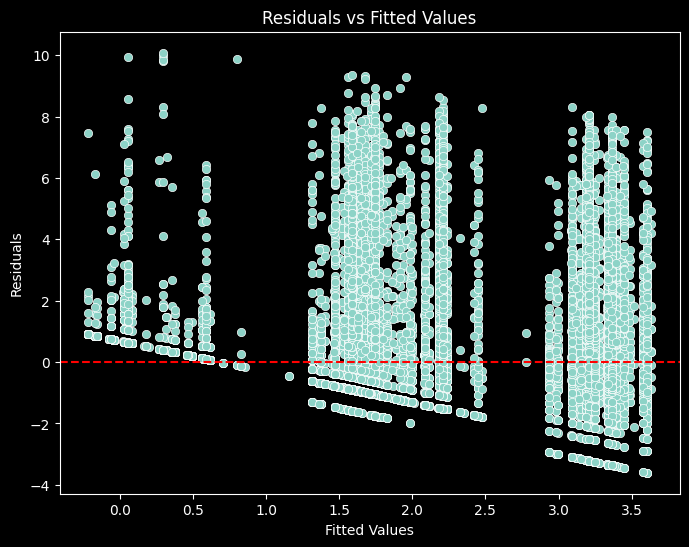

In [284]:
residuals = model_score_1.resid
fitted_values = model_score_1.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

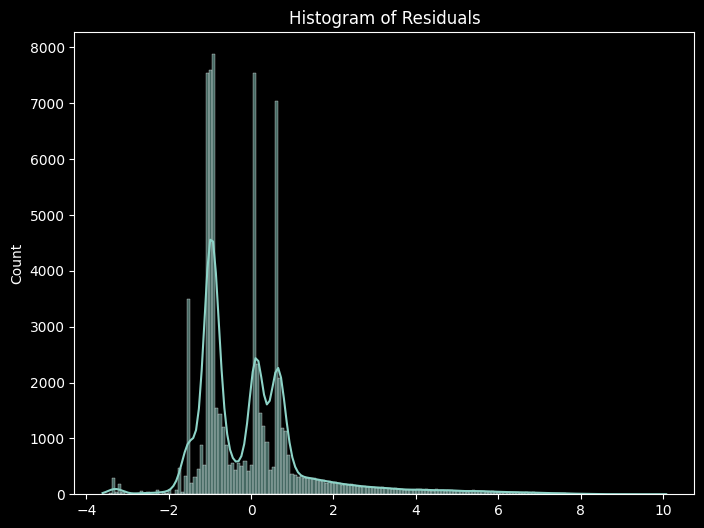

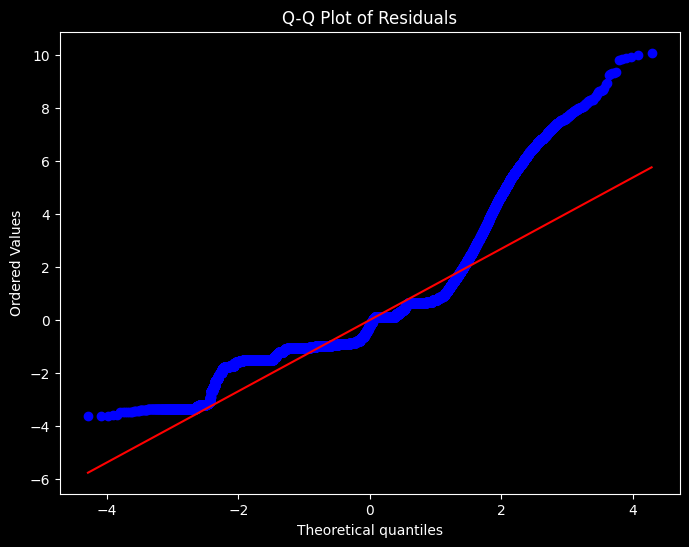

In [285]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### OLS Log Number of Comments


In [286]:
cv_num_comments = ["author_premium", "locked", "removed_post", "Q1", "Q2", "Q3"]

In [287]:
X = sm.add_constant(df_ols[independent_variables + cv_num_comments]).astype(float)
y = np.log(df_ols["num_comments"] + 1)
model_comments_1 = sm.OLS(y, X).fit()
display(model_comments_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_comments   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     804.5
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:01:08   Log-Likelihood:            -1.0431e+05
No. Observations:               76211   AIC:                         2.087e+05
Df Residuals:                   76194   BIC:                         2.088e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0639      0.013     -5.013      0.000      -0.089      -0.039
screenshot            -0.1050      0.021     -5.049      0.000      -0.146      -0.064
text                  -0.0132      0.009     -1.434      0.151      -0.031       0.005
photo                 -0.0846      0.021     -4.116      0.000      -0.125      -0.044
drawing               -0.0892      0.026     -3.479      0.001      -0.139      -0.039
emotional_reaction    -0.0825      0.037     -2.239      0.025      -0.155      -0.010
template              -0.0392      0.014     -2.823      0.005      -0.066      -0.012
event_reaction        -0.5206      0.476     -1.095      0.274      -1.453       0.412
macro                  0.0460      0.052      0.878      0.380      -0.057       0.149
comic                  0.0648      0.020      3.294      0.001       0.026       0.103
meme_character        -0.0235      0.071     -0.331      0.740      -0.163       0.116
author_premium         0.2341      0.019     12.437      0.000       0.197       0.271
locked                 0.3182      0.013     23.684      0.000       0.292       0.345
removed_post          -0.7253      0.007   -100.303      0.000      -0.739      -0.711
Q1                     0.2912      0.010     30.311      0.000       0.272       0.310
Q2                     0.1576      0.010     15.225      0.000       0.137       0.178
Q3                    -0.0306      0.010     -3.166      0.002      -0.050      -0.012
==============================================================================
Omnibus:                    40672.830   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374978.181
Skew:                           2.419   Prob(JB):                         0.00
Kurtosis:                      12.730   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)

,Variable,VIF
0,const,13.702857
1,screenshot,1.020258
2,text,1.056571
3,photo,1.024585
4,drawing,1.014519
5,emotional_reaction,1.005324
6,template,1.034563
7,event_reaction,1.000173
8,macro,1.002588
9,comic,1.017871


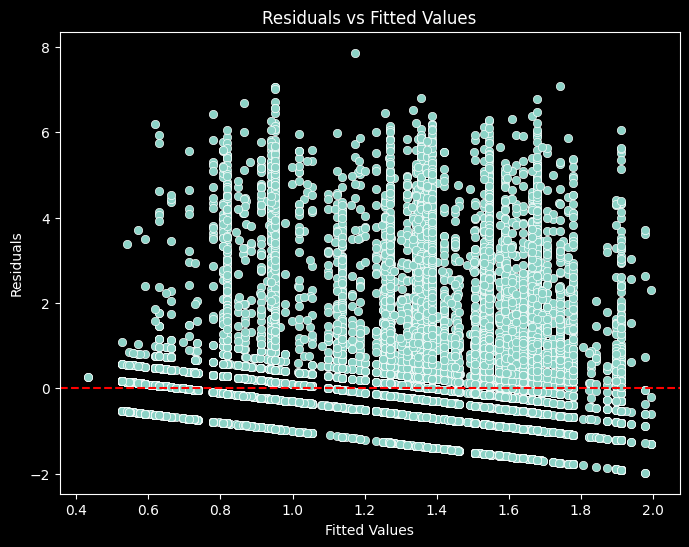

In [289]:
residuals = model_comments_1.resid
fitted_values = model_comments_1.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

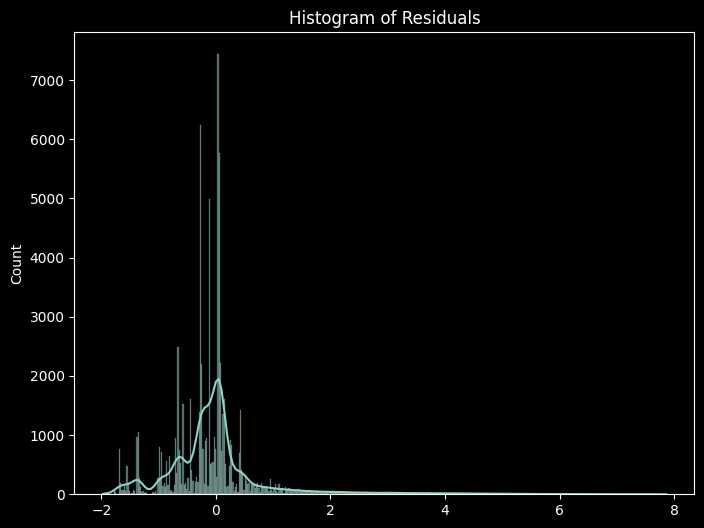

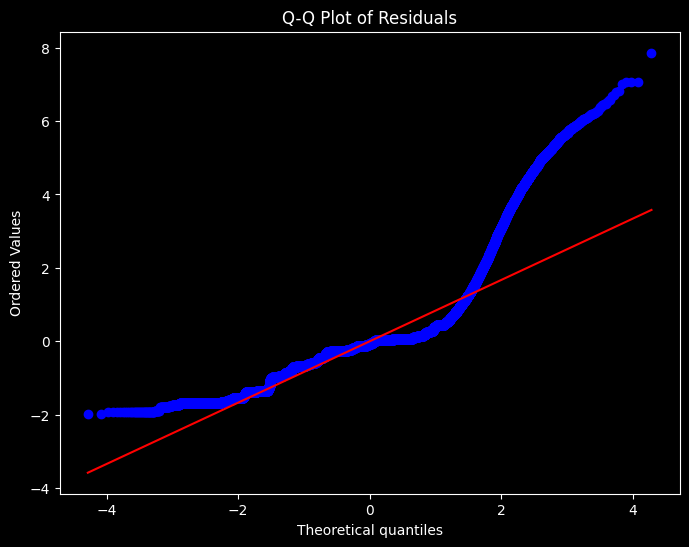

In [290]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### LOGIT Awards


In [291]:
cv_awards = ["author_premium", "removed_post"]

In [292]:
X = sm.add_constant(df_ols[independent_variables + cv_awards]).astype(float)
y = df_ols["has_awards"]
model_awards_1 = sm.Logit(y, X).fit()
display(model_awards_1.summary())

         Current function value: 0.032420
         Iterations: 35


/home/martim-esteves1/reddit-memes/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             has_awards   No. Observations:                76211
Model:                          Logit   Df Residuals:                    76198
Method:                           MLE   Df Model:                           12
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.06580
Time:                        06:01:11   Log-Likelihood:                -2470.7
converged:                      False   LL-Null:                       -2644.8
Covariance Type:            nonrobust   LLR p-value:                 3.616e-67
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.1617      0.244    -33.490      0.000      -8.639      -7.684
screenshot            -0.5349      0.453     -1.181      0.238      -1.423       0.353
text                   0.0361      0.125      0.288      0.773      -0.209       0.282
photo                 -0.2615      0.415     -0.630      0.529      -1.075       0.552
drawing               -0.5949      0.582     -1.022      0.307      -1.736       0.547
emotional_reaction     0.2531      0.454      0.557      0.578      -0.638       1.144
template              -0.1211      0.214     -0.566      0.571      -0.540       0.298
event_reaction        -9.5690    783.706     -0.012      0.990   -1545.606    1526.467
macro                  0.9331      0.457      2.040      0.041       0.037       1.829
comic                  0.2816      0.233      1.207      0.227      -0.176       0.739
meme_character       -16.0299   2923.109     -0.005      0.996   -5745.218    5713.158
author_premium         0.9809      0.143      6.845      0.000       0.700       1.262
removed_post          -1.7766      0.130    -13.680      0.000      -2.031      -1.522
======================================================================================
"""

In [293]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)

,Variable,VIF
0,const,10.284211
1,screenshot,1.020183
2,text,1.055695
3,photo,1.023653
4,drawing,1.014079
5,emotional_reaction,1.005167
6,template,1.034348
7,event_reaction,1.000035
8,macro,1.002582
9,comic,1.017755


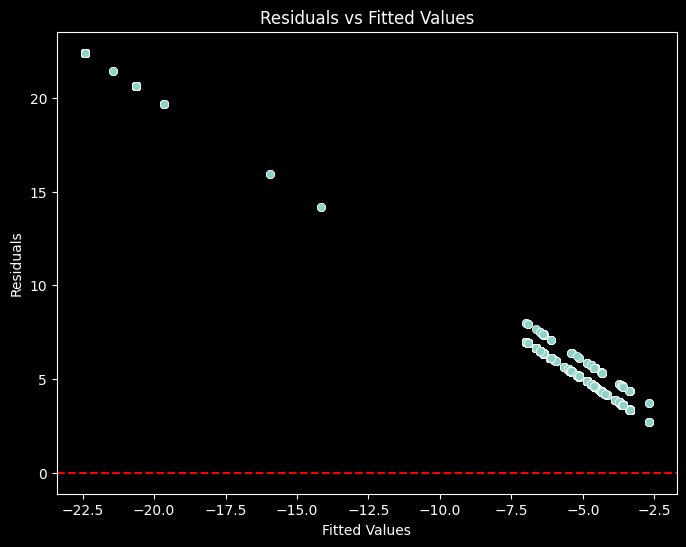

In [294]:

residuals = y - model_awards_1.fittedvalues
fitted_values = model_awards_1.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


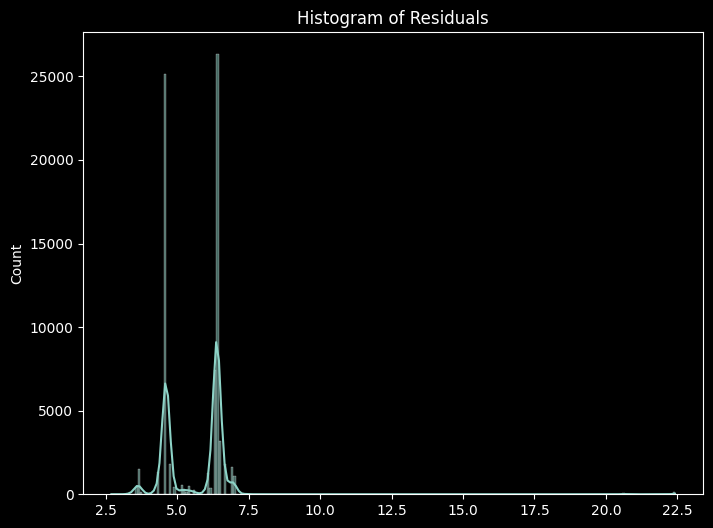

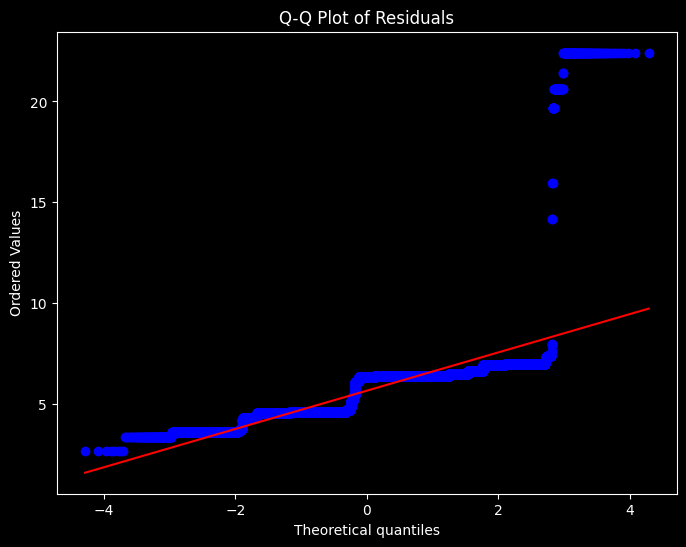

In [295]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

---
## OLS & Logit 2 - independent variables:
- Stable
- Remixed

In [296]:
independent_variables = ["stable"]  # Dropped remixed to avoid multicollinearity

### OLS Log Score 

In [297]:
cv_score = ["author_premium", "removed_post", "Q1", "Q2", "Q3"]

In [298]:
X = sm.add_constant(df_ols[independent_variables + cv_score]).astype(float)
y = np.log(df_ols["score"] + 1)
model_score_2 = sm.OLS(y, X).fit()
display(model_score_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     6400.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:01:16   Log-Likelihood:            -1.3841e+05
No. Observations:               76211   AIC:                         2.768e+05
Df Residuals:                   76204   BIC:                         2.769e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0636      0.019    -55.085      0.000      -1.101      -1.026
stable            -0.0786      0.012     -6.365      0.000      -0.103      -0.054
author_premium     0.2427      0.029      8.247      0.000       0.185       0.300
removed_post      -1.6335      0.011   -147.086      0.000      -1.655      -1.612
Q1                 1.1607      0.015     77.277      0.000       1.131       1.190
Q2                 1.0053      0.016     62.730      0.000       0.974       1.037
Q3                -0.5317      0.015    -35.187      0.000      -0.561      -0.502
==============================================================================
Omnibus:                    31711.045   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160536.962
Skew:                           1.985   Prob(JB):                         0.00
Kurtosis:                       8.898   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)

,Variable,VIF
0,const,12.834361
1,stable,1.002887
2,author_premium,1.026138
3,removed_post,1.035851
4,Q1,1.544077
5,Q2,1.479301
6,Q3,1.548963


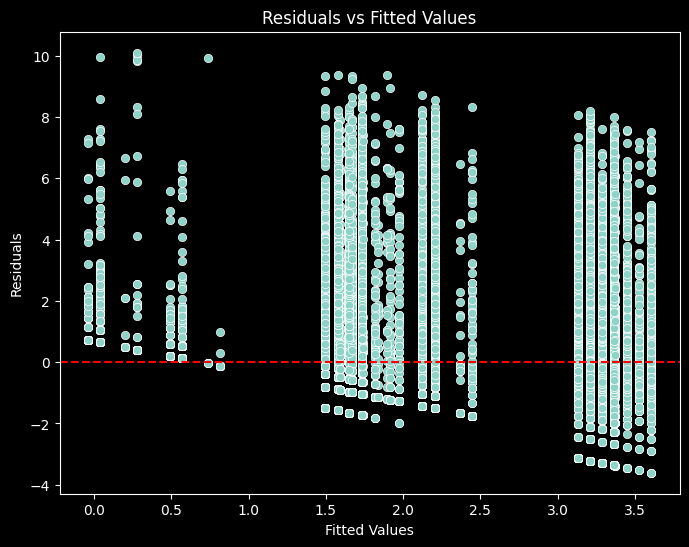

In [300]:
residuals = model_score_2.resid
fitted_values = model_score_2.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

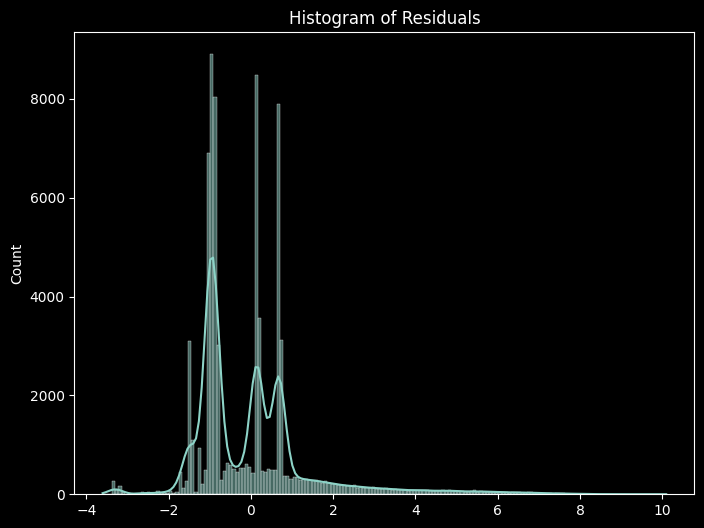

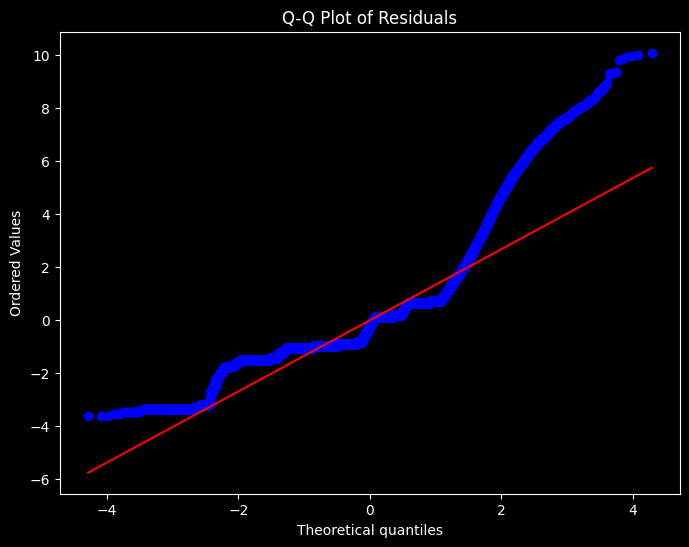

In [301]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### OLS Log Number of Comments


In [302]:
cv_num_comments = ["author_premium", "locked", "removed_post", "Q1", "Q2", "Q3"]

In [303]:
X = sm.add_constant(df_ols[independent_variables + cv_num_comments]).astype(float)
y = np.log(df_ols["num_comments"] + 1)
model_comments_2 = sm.OLS(y, X).fit()
display(model_comments_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_comments   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1830.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:01:17   Log-Likelihood:            -1.0434e+05
No. Observations:               76211   AIC:                         2.087e+05
Df Residuals:                   76203   BIC:                         2.088e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0736      0.013     -5.862      0.000      -0.098      -0.049
stable            -0.0354      0.008     -4.479      0.000      -0.051      -0.020
author_premium     0.2356      0.019     12.516      0.000       0.199       0.273
locked             0.3195      0.013     23.778      0.000       0.293       0.346
removed_post      -0.7303      0.007   -101.624      0.000      -0.744      -0.716
Q1                 0.2923      0.010     30.434      0.000       0.274       0.311
Q2                 0.1589      0.010     15.349      0.000       0.139       0.179
Q3                -0.0306      0.010     -3.167      0.002      -0.050      -0.012
==============================================================================
Omnibus:                    40722.304   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376107.409
Skew:                           2.422   Prob(JB):                         0.00
Kurtosis:                      12.745   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)

,Variable,VIF
0,const,13.270913
1,stable,1.002984
2,author_premium,1.027167
3,locked,1.061898
4,removed_post,1.060796
5,Q1,1.544423
6,Q2,1.509817
7,Q3,1.549477


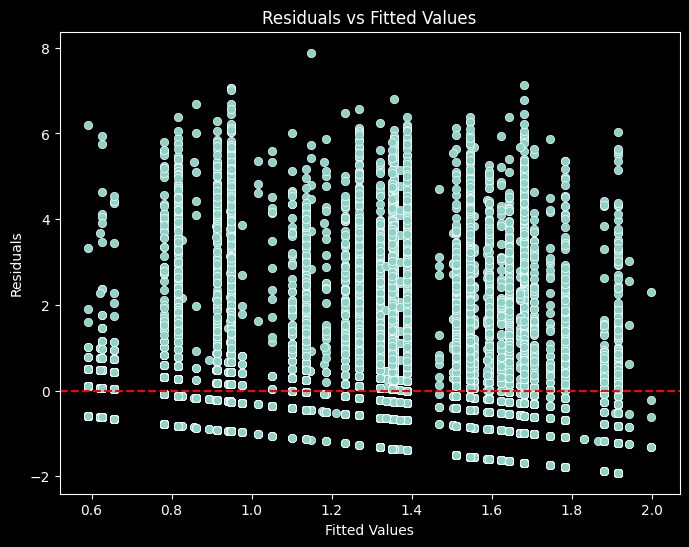

In [305]:
residuals = model_comments_2.resid
fitted_values = model_comments_2.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

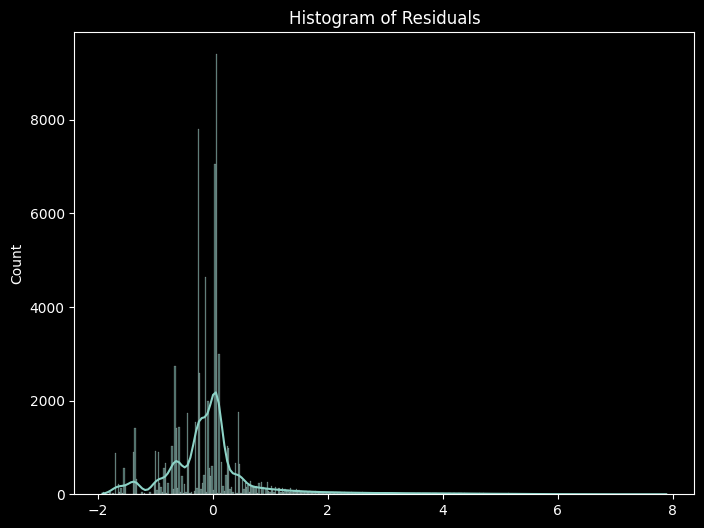

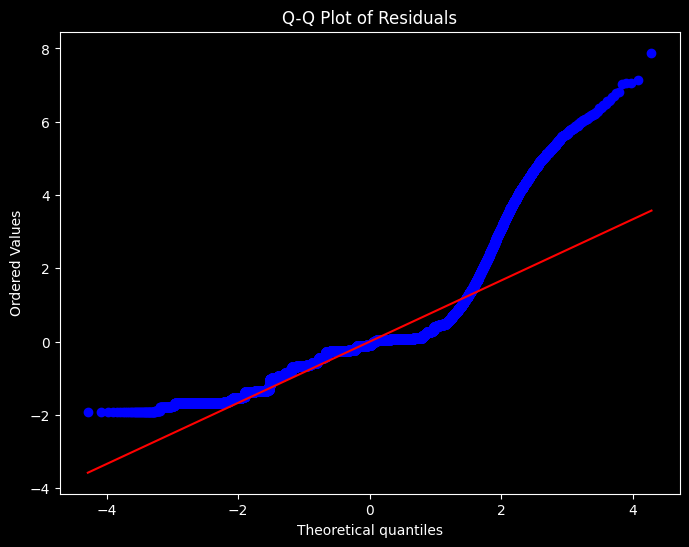

In [306]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### LOGIT Awards


In [307]:
cv_awards = ["author_premium", "removed_post"]

In [308]:
X = sm.add_constant(df_ols[independent_variables + cv_awards]).astype(float)
y = df_ols["has_awards"]
model_awards_2 = sm.Logit(y, X).fit()
display(model_awards_2.summary())

Optimization terminated successfully.
         Current function value: 0.032490
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             has_awards   No. Observations:                76211
Model:                          Logit   Df Residuals:                    76207
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.06378
Time:                        06:01:20   Log-Likelihood:                -2476.1
converged:                       True   LL-Null:                       -2644.8
Covariance Type:            nonrobust   LLR p-value:                 8.173e-73
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.1923      0.242    -33.899      0.000      -8.666      -7.719
stable            -0.0619      0.116     -0.535      0.593      -0.289       0.165
author_premium     0.9846      0.143      6.875      0.000       0.704       1.265
removed_post      -1.8012      0.129    -13.922      0.000      -2.055      -1.548
==================================================================================
"""

In [309]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)

,Variable,VIF
0,const,9.870397
1,stable,1.002276
2,author_premium,1.021757
3,removed_post,1.023946


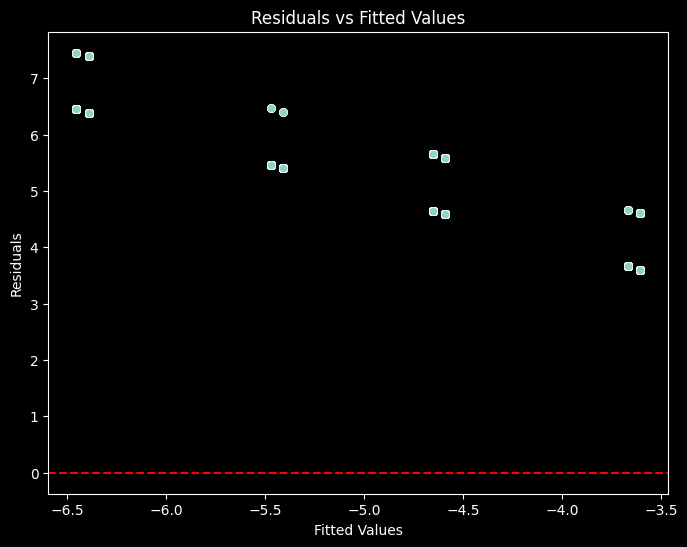

In [310]:
residuals = y - model_awards_2.fittedvalues
fitted_values = model_awards_2.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

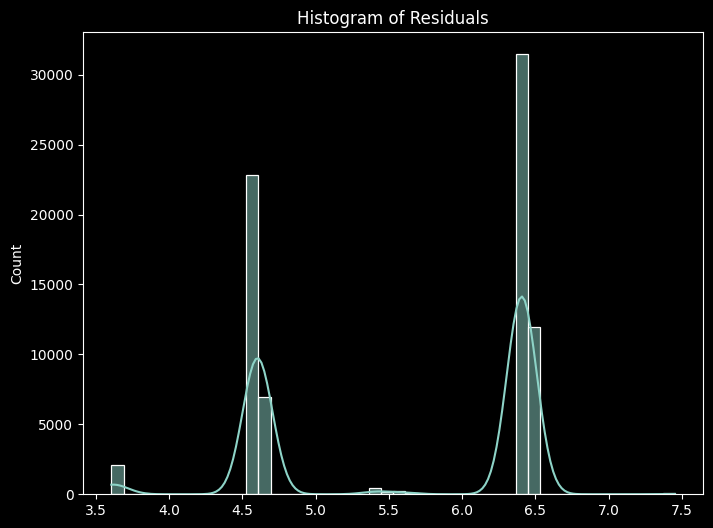

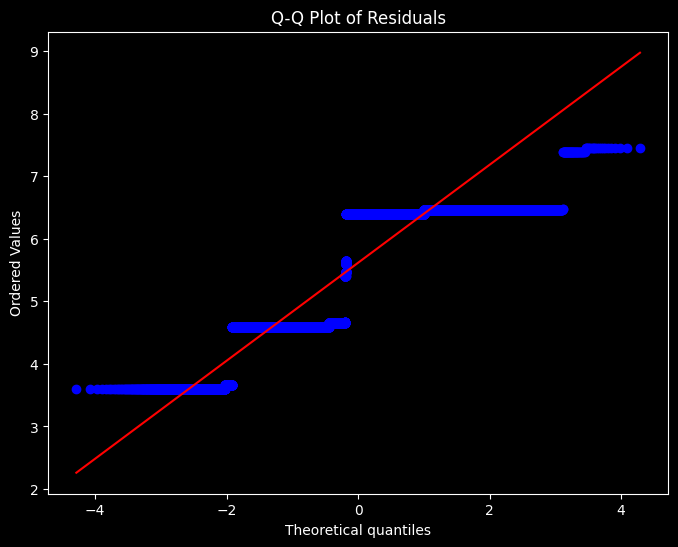

In [311]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

---
## Formatted Output

In [312]:
stargazer = Stargazer([model_score_1, 
                       model_comments_1,
                       model_awards_1,
                       model_score_2,
                       model_comments_2,
                       model_awards_2])

stargazer.title("Regression Results")
stargazer.custom_columns(["Score (Set 1)", 
                          "Comments (Set 1)",
                          "Awards (Set 1)",
                          "Score (Set 2)",
                          "Comments (Set 2)",
                          "Awards (Set 2)"],
                          [1, 
                           1,
                           1,
                           1,
                           1,
                           1])
stargazer.significant_digits(3)
html_output = stargazer.render_html()
display(HTML(html_output))

In [313]:
model_score_1_normalized = model_score_1
model_score_1_normalized.params = np.exp(model_score_1.params) - 1

model_comments_1_normalized = model_comments_1
model_comments_1_normalized.params = np.exp(model_comments_1.params) - 1

model_score_2_normalized = model_score_2
model_score_2_normalized.params = np.exp(model_score_2.params) - 1

model_comments_2_normalized = model_comments_2
model_comments_2_normalized.params = np.exp(model_comments_2.params) - 1

In [257]:
stargazer = Stargazer([model_score_1_normalized, 
                       model_comments_1_normalized,
                       model_awards_1,
                       model_score_2_normalized,
                       model_comments_2_normalized,
                       model_awards_2])

stargazer.title("Regression Results")
stargazer.custom_columns(["Score (Set 1)", 
                          "Comments (Set 1)",
                          "Awards (Set 1)",
                          "Score (Set 2)",
                          "Comments (Set 2)",
                          "Awards (Set 2)"],
                          [1, 
                           1,
                           1,
                           1,
                           1,
                           1])
stargazer.significant_digits(3)
html_output_2 = stargazer.render_html()
display(HTML(html_output_2))